# Objective :

To analyse :<br>
1.If patient lives for 5 years or longer<br>
2.If patient dies within 5 years

In [117]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

There are three features:<br><br>
    1.Age of the patient at the time of operation.<br>
    2.Year in which the operation took place(1900).<br>
    3.number of positive axillary nodes.(A positive axillary lymph node is a lymph node in the area to which cancer has spread.)<br><br>
Output variable : Survival status of the patient
    

In [118]:
#reading the haberman.csv file 
#naming columns as['age','year','node','survival']
value=pd.read_csv("haberman.csv",names=['age','op_year','ax_node','survival_stat']) 

#knowing the shape i.e number of rows and columns
print(value.shape)

(306, 4)


The file has 306 rows and 4 columns.

In [119]:
print(value.survival_stat.value_counts())  #this to check the total number of survival status 

1    225
2     81
Name: survival_stat, dtype: int64


1 are patient who have lived for 5 years and more<br>
2 are patient who died in 5 years

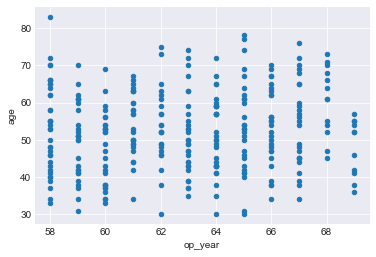

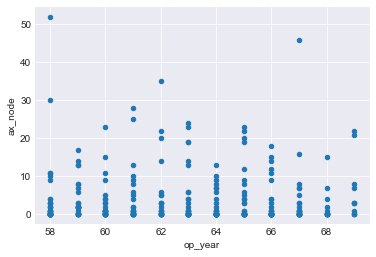

In [120]:
value.plot(kind="scatter",x="op_year",y="age")      #plot of age vs operation year
value.plot(kind="scatter",x="op_year",y="ax_node")  #plot of axilliary node vs operation year
plt.show()

# Observation :

In the above plots we are not able to find anything useful,as we are not able to differentiate.<br>Let us try other types of plot and try to extract useful information.<br><br>
we have to colour the output value to understand the difference.

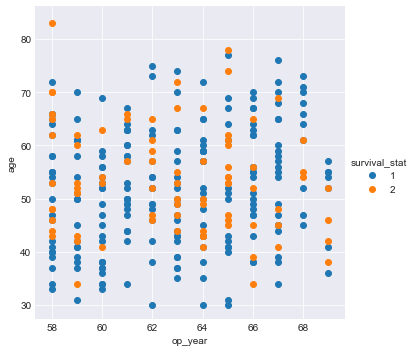

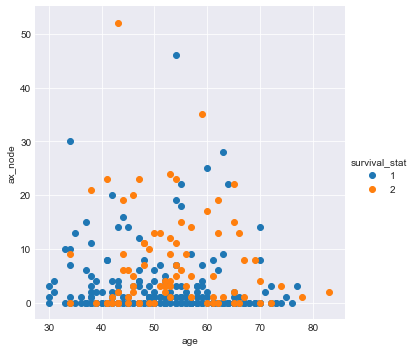

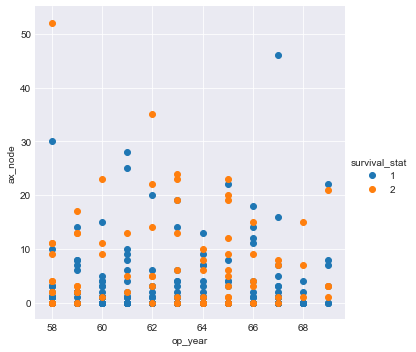

In [121]:
sns.set_style("darkgrid")
#plot of age vs operation year
sns.FacetGrid(value,hue='survival_stat',size=5).map(plt.scatter,'op_year','age').add_legend()

#plot of axilliary node vs age
sns.FacetGrid(value,hue='survival_stat',size=5).map(plt.scatter,'age','ax_node').add_legend()

#plot of axilliary node vs operation year
sns.FacetGrid(value,hue='survival_stat',size=5).map(plt.scatter,'op_year','ax_node').add_legend()
plt.show()

Let us use pair plotting to see other possibilities and try to extract some useful data.
<br><br>
pair plotting comes under multi variate, it gives all possibilites of graph(it is useful only when we have less features)

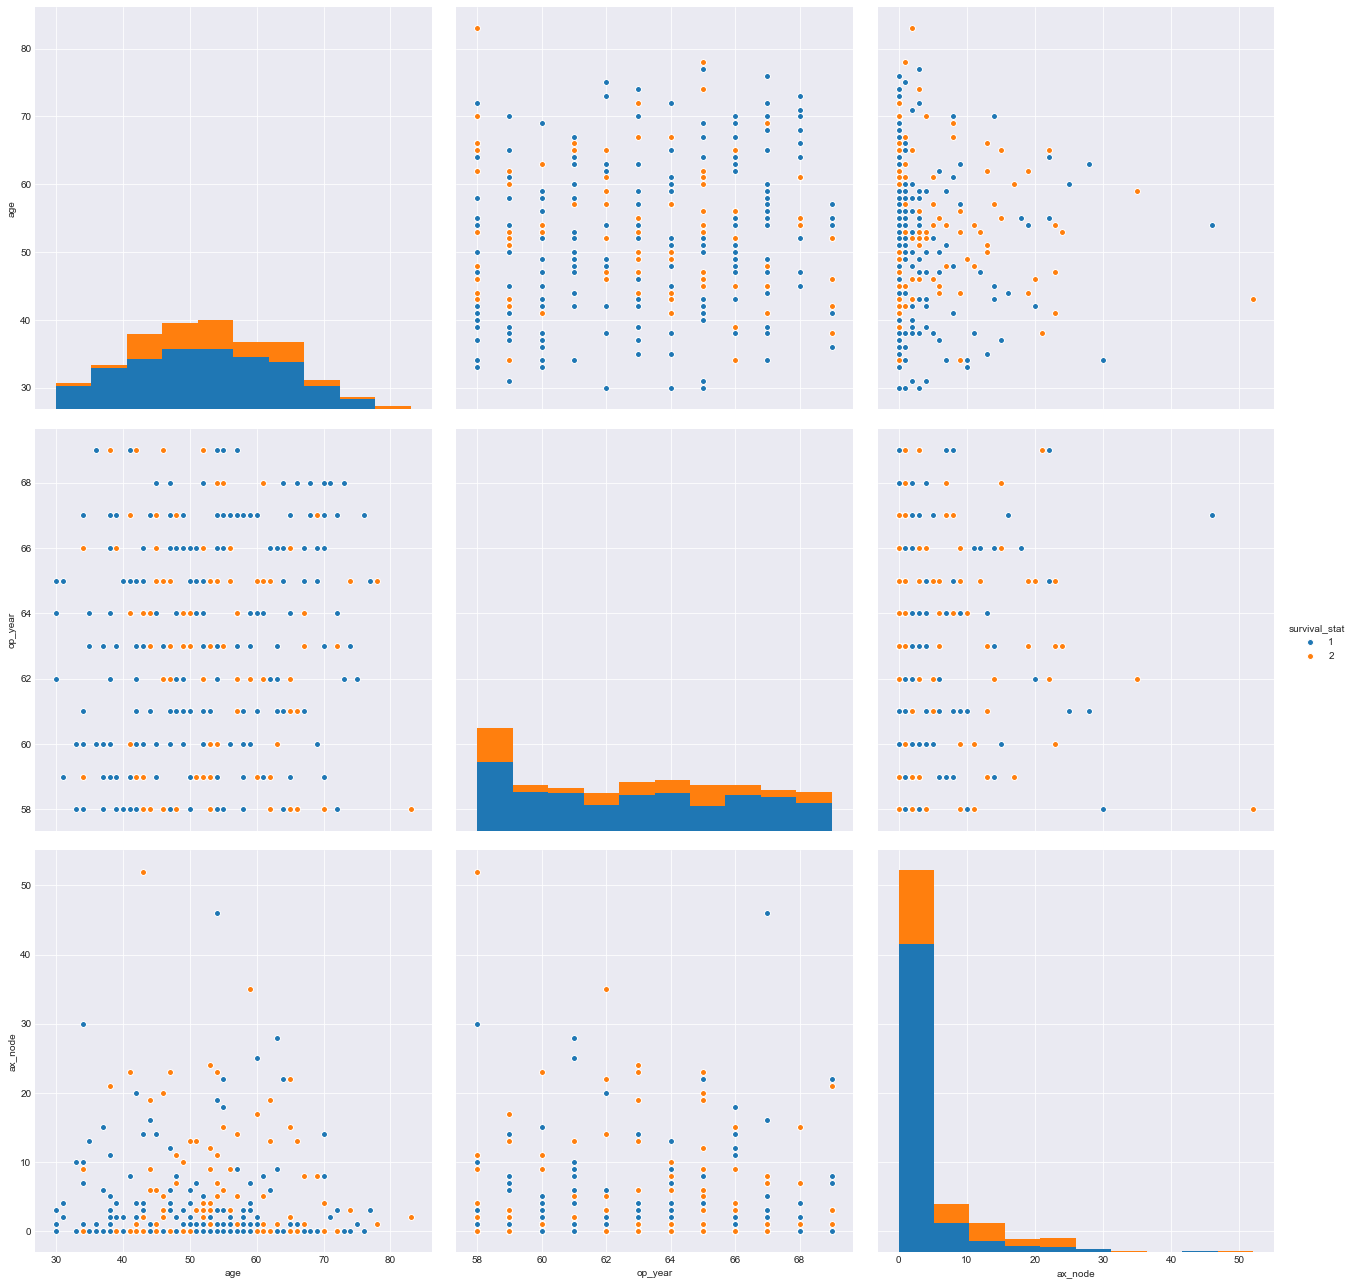

In [122]:
sns.set_style("darkgrid")
#hue : Variable in "value" which is to be differentiated.
#vars : It makes combinations of all the plots in vars,otherwise it takes all column
sns.pairplot(value,hue="survival_stat",vars=['age','op_year','ax_node'],size=6)
plt.show()

# Observation :

All these plots are not able to produce different pattern to predict survival status.<br><br>So we have to try other methods (univariate) like pdf ,cdf ,boxplot ,violinplot.

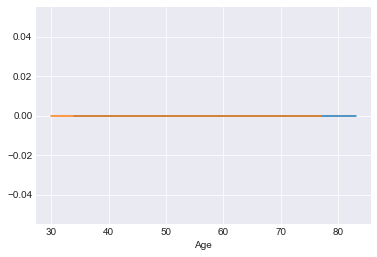

In [123]:
under_5=value.loc[value.survival_stat==2] #patient died within 5 years
over_5=value.loc[value.survival_stat==1]  #patient lived 5 years or more
plt.plot(under_5.age,np.zeros_like(under_5.age))
plt.plot(over_5.age,np.zeros_like(over_5.age))
plt.xlabel("Age")
plt.show()

# observation :

This 1D plot is not at all useful as both lines are overlapping, making no useful information extraction

C:\Users\himateja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\himateja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\himateja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\himateja\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\himateja\Anaconda3\lib\site-packages\matplotlib

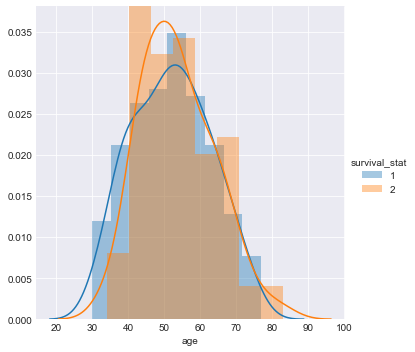

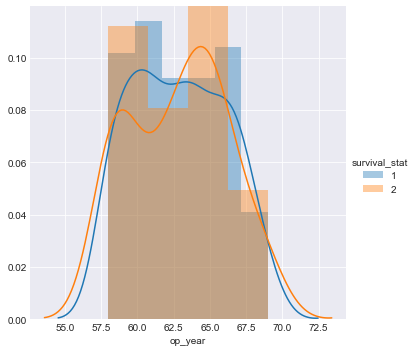

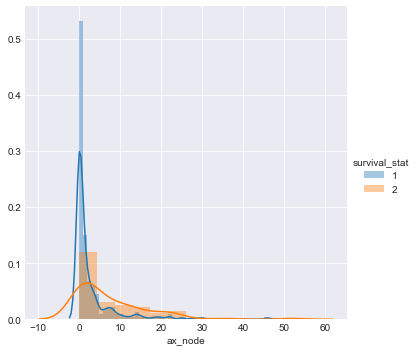

In [124]:
sns.FacetGrid(value,hue="survival_stat",size=5).map(sns.distplot,'age').add_legend()
sns.FacetGrid(value,hue="survival_stat",size=5).map(sns.distplot,'op_year').add_legend()
sns.FacetGrid(value,hue="survival_stat",size=5).map(sns.distplot,'ax_node').add_legend()
plt.show()

# Observation :

According to the plots , histogram and pdf are not useful for extracting information.<br>
As they both are overlapped for respective survival status.

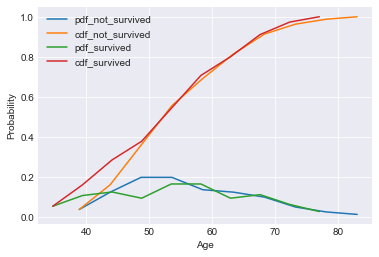

In [125]:
#plotting both survival status
c_age,b_age=np.histogram(under_5.age,bins=10,density=True)
c_age_s,b_age_s=np.histogram(over_5.age,bins=10,density=True)

pdf_ns=c_age/sum(c_age)
cdf_ns=np.cumsum(pdf_ns)
pdf_s=c_age_s/sum(c_age_s)
cdf_s=np.cumsum(pdf_s)

plt.plot(b_age[1:],pdf_ns)
plt.plot(b_age[1:],cdf_ns)
plt.plot(b_age_s[1:],pdf_s)
plt.plot(b_age_s[1:],cdf_s)

plt.xlabel("Age")
plt.ylabel("Probability")
plt.legend(['pdf_not_survived','cdf_not_survived','pdf_survived','cdf_survived'])
plt.show()

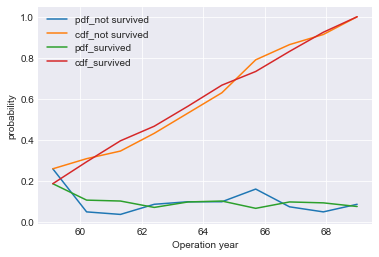

In [126]:
c_op,b_op=np.histogram(under_5.op_year,bins=10,density=True)
c_op_s,b_op_s=np.histogram(over_5.op_year,bins=10,density=True)

pdf_ns=c_op/sum(c_op)
cdf_ns=np.cumsum(pdf_ns)
pdf_s=c_op_s/sum(c_op_s)
cdf_s=np.cumsum(pdf_s)

plt.plot(b_op[1:],pdf_ns)
plt.plot(b_op[1:],cdf_ns)
plt.plot(b_op_s[1:],pdf_s)
plt.plot(b_op_s[1:],cdf_s)

plt.xlabel("Operation year")
plt.ylabel("probability")
plt.legend(['pdf_not survived','cdf_not survived','pdf_survived','cdf_survived'])
plt.show()

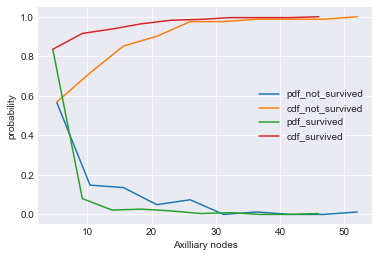

In [127]:
c_ax,b_ax=np.histogram(under_5.ax_node,bins=10,density=True)
c_ax_s,b_ax_s=np.histogram(over_5.ax_node,bins=10,density=True)


pdf_ns=c_ax/sum(c_ax)
cdf_ns=np.cumsum(pdf_ns)
pdf_s=c_ax_s/sum(c_ax_s)
cdf_s=np.cumsum(pdf_s)

plt.plot(b_ax[1:],pdf_ns)
plt.plot(b_ax[1:],cdf_ns)
plt.plot(b_ax_s[1:],pdf_s)
plt.plot(b_ax_s[1:],cdf_s)

plt.xlabel("Axilliary nodes")
plt.ylabel("probability")
plt.legend(['pdf_not_survived','cdf_not_survived','pdf_survived','cdf_survived'])
plt.show()

# Observation :
As we can see pdf are also overlapping a lot it is difficult to differentiate with pdf.<br>
Lets try boxplot and violinplot. 

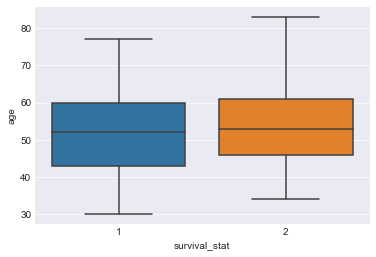

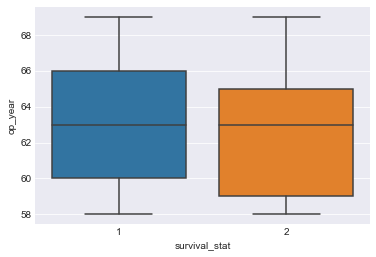

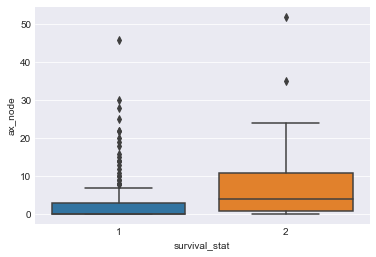

In [128]:
sns.boxplot(x="survival_stat",y="age",data=value)
plt.show()
sns.boxplot(x="survival_stat",y="op_year",data=value)
plt.show()
sns.boxplot(x="survival_stat",y="ax_node",data=value)
plt.show()

# Observation:
Boxplot is also not helpful as 25th,50th,75th percentile have approximately same values.<br>
lets once check for mean ,median ,std.

In [143]:
print(over_5.describe())
print("*"*57)
print(under_5.describe())

              age     op_year     ax_node  survival_stat
count  225.000000  225.000000  225.000000          225.0
mean    52.017778   62.862222    2.791111            1.0
std     11.012154    3.222915    5.870318            0.0
min     30.000000   58.000000    0.000000            1.0
25%     43.000000   60.000000    0.000000            1.0
50%     52.000000   63.000000    0.000000            1.0
75%     60.000000   66.000000    3.000000            1.0
max     77.000000   69.000000   46.000000            1.0
*********************************************************
             age    op_year    ax_node  survival_stat
count  81.000000  81.000000  81.000000           81.0
mean   53.679012  62.827160   7.456790            2.0
std    10.167137   3.342118   9.185654            0.0
min    34.000000  58.000000   0.000000            2.0
25%    46.000000  59.000000   1.000000            2.0
50%    53.000000  63.000000   4.000000            2.0
75%    61.000000  65.000000  11.000000            2

In [140]:
print(under_5.median())
print("*")
print(over_5.median())

age              53.0
op_year          63.0
ax_node           4.0
survival_stat     2.0
dtype: float64
**********************
age              52.0
op_year          63.0
ax_node           0.0
survival_stat     1.0
dtype: float64


# Observation:
1.The median of axilliary node of patient living for 5 years and more is LESS than the median patient died within 5years<br>
2.The mean of axilliary node of patient living for 5 years and more is LESS than the mean of patient died within 5years<br>
<br>
lets even checkout violinplot. 

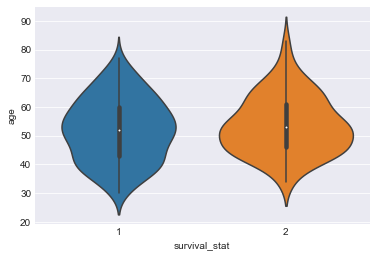

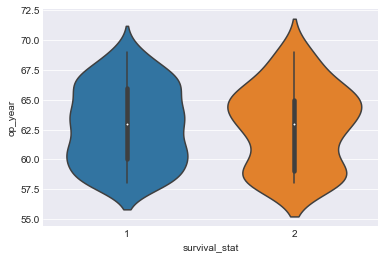

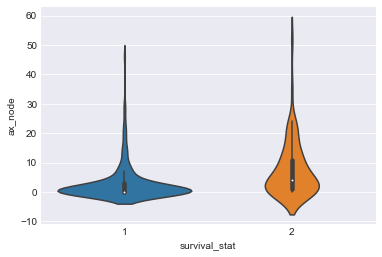

In [131]:
sns.violinplot(x="survival_stat",y="age",data=value)
plt.show()
sns.violinplot(x="survival_stat",y="op_year",data=value)
plt.show()
sns.violinplot(x="survival_stat",y="ax_node",data=value)
plt.show()

# Observation :
The violin plots are also very similar to the each other ,so the violin plots are not able to provide the information.

# Conclusion :
1.Scatter plots were unable to provide required information.<br>
2.1-D plots are overlapping,so the required information was not acquired.<br>
3.Pair plotting didn't have the required graph.<br>
4.Histogram was also a failure as both survival status were overlapping.<br>
5.pdf and cdf were also overlapping.<br>
6.Boxplot and violin plot had similar values for both survival status.<br>
7.Mean and median are helpful.longliving have less mean and median than shortliving.<br>